# Filtering Lines by Quantum Number

In this tutorial, we filter lines by the difference of vibrational quantum number between lower and upper states, $\Delta \nu$.

In [1]:
from exojax.utils.grids import wavenumber_grid
nu_grid, wav, resolution = wavenumber_grid(24000.0, 26000,80000, unit="AA", xsmode="premodit")

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit


Normally, "mdb" performs the activation automatically. 
We would like to avoid this automatic activation and 
perform activation after the user defines the mask. 
To do this, call mdb with activation=False.
We also would use the quantum number available in this database.
So, use optional_quantum_states=True.

In [3]:
from exojax.database import api 
mdb = api.MdbExomol("CO/12C-16O/Li2015/", nu_grid, optional_quantum_states=True, activation=False)

HITRAN exact name= (12C)(16O)
Background atmosphere:  H2
Reading CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2
DataFrame (self.df) available.


When called activation turn off, the DataFrame becomes automatically available. Check mdb.df.

In [4]:
print(mdb.df)

#        i_upper    i_lower    A          nu_lines      gup    jlower    jupper    elower      v_l    v_u    kp_l    kp_u    Sij0
0        84         42         1.155e-06  2.405586      3      0         1         66960.7124  41     41     e       e       3.811968898414225e-164
1        83         41         1.161e-06  2.441775      3      0         1         65819.903   40     40     e       e       9.663028103692631e-162
2        82         40         1.162e-06  2.477774      3      0         1         64654.9206  39     39     e       e       2.7438392479197905e-159
3        81         39         1.159e-06  2.513606      3      0         1         63465.8042  38     38     e       e       8.73322833971394e-157
4        80         38         1.152e-06  2.549292      3      0         1         62252.5793  37     37     e       e       3.115220404216648e-154
...      ...        ...        ...        ...           ...    ...       ...       ...         ...    ...    ...     ...     ...
1

So, we can use the above information for masking the molecular lines. DataFrame is not limited by nu_grids. So, all of the lines are visible (but using lazy I/O of vaex). Let's plot the line strength with different $\Delta \nu$.

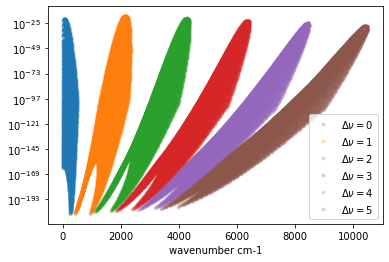

In [8]:
import matplotlib.pyplot as plt
for dv in range(0, 6):
    mask = mdb.df["v_u"] - mdb.df["v_l"] == dv
    dfv = mdb.df[mask]
    plt.plot(dfv["nu_lines"].values,
             dfv["Sij0"].values,
             ".",
             label="$\\Delta \\nu = $" + str(dv),
             alpha=0.2)
plt.legend()
plt.yscale("log")
plt.xlabel("wavenumber cm-1")
plt.show()

In ExoJAX, we need activate "mdb". User-defined mask for DataFrame can be used as load_mask option of msb.activate.

In [9]:
load_mask = (mdb.df["v_u"] - mdb.df["v_l"] == 2)
mdb.activate(mdb.df, load_mask)

.broad is used.
Broadening code level= a0
default broadening parameters are used for  69  J lower states in  150  states


The following lines are activated and can be used further analysis as usual.

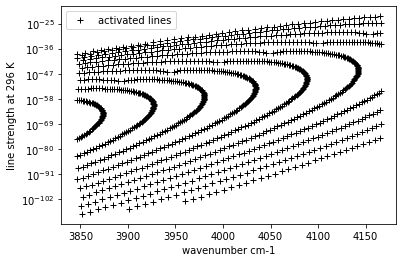

In [11]:
plt.plot(mdb.nu_lines,
         mdb.line_strength_ref,
         "+",
         color="black",
         label="activated lines")
plt.legend()
plt.ylabel("line strength at 296 K")
plt.xlabel("wavenumber cm-1")
plt.yscale("log")
plt.show()

# %%

Note that the above process is also applicable to MdbHitemp and MdbHitran.

In tests/integration/moldb
these examples are available for reference.

- quantum_states_filter_exomol.py
- quantum_states_filter_hitemp.py
- quantum_states_filter_hitran_co.py
